**Question 2: A. Sentiment Analysis Twitter Airline**




Data Preprocessing and Exploratory Data Analysis

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Load dataset
file_path = 'Tweets.xlsx'
data = pd.read_excel(file_path)

# Filter positive and negative sentiments
binary_sentiment_data = data[data['airline_sentiment'].isin(['positive', 'negative'])]
binary_sentiment_data['sentiment'] = binary_sentiment_data['airline_sentiment'].map({'positive': 1, 'negative': 0})

# Text data and labels
X = binary_sentiment_data['text']
y = binary_sentiment_data['sentiment']

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features
X_tfidf = vectorizer.fit_transform(X).toarray()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

print("Preprocessing Done")

<ipython-input-8-9601abff0f69>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binary_sentiment_data['sentiment'] = binary_sentiment_data['airline_sentiment'].map({'positive': 1, 'negative': 0})


Preprocessing Done



*   Create a simple feed-forward neural network for binary sentiment classification
(positive/negative).
*   Use backpropagation to optimize the model's weights based on error calculation.


*    Experiment with different activation functions (sigmoid, ReLU, tanh) in the hidden layer
and compare the model's performance.
*   Evaluate the model on a test set using accuracy and plot the loss over epochs.






Training with Sigmoid activation:
Epoch [10/100], Loss: 0.6474
Epoch [20/100], Loss: 0.6195
Epoch [30/100], Loss: 0.5977
Epoch [40/100], Loss: 0.5806
Epoch [50/100], Loss: 0.5671
Epoch [60/100], Loss: 0.5564
Epoch [70/100], Loss: 0.5479
Epoch [80/100], Loss: 0.5410
Epoch [90/100], Loss: 0.5355
Epoch [100/100], Loss: 0.5311
Activation Function: Sigmoid, Accuracy: 80.64%


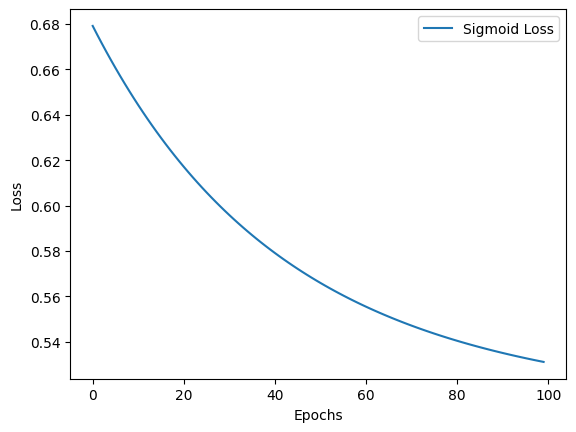


Training with ReLU activation:
Epoch [10/100], Loss: 0.7410
Epoch [20/100], Loss: 0.7287
Epoch [30/100], Loss: 0.7171
Epoch [40/100], Loss: 0.7061
Epoch [50/100], Loss: 0.6957
Epoch [60/100], Loss: 0.6857
Epoch [70/100], Loss: 0.6763
Epoch [80/100], Loss: 0.6673
Epoch [90/100], Loss: 0.6587
Epoch [100/100], Loss: 0.6506
Activation Function: ReLU, Accuracy: 80.64%


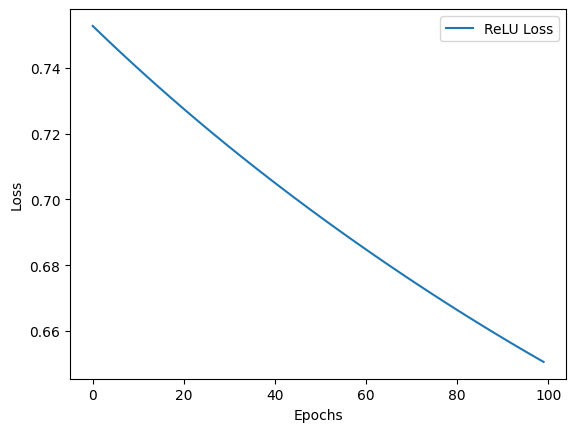


Training with Tanh activation:
Epoch [10/100], Loss: 0.6694
Epoch [20/100], Loss: 0.6585
Epoch [30/100], Loss: 0.6483
Epoch [40/100], Loss: 0.6388
Epoch [50/100], Loss: 0.6300
Epoch [60/100], Loss: 0.6218
Epoch [70/100], Loss: 0.6142
Epoch [80/100], Loss: 0.6071
Epoch [90/100], Loss: 0.6005
Epoch [100/100], Loss: 0.5943
Activation Function: Tanh, Accuracy: 80.64%


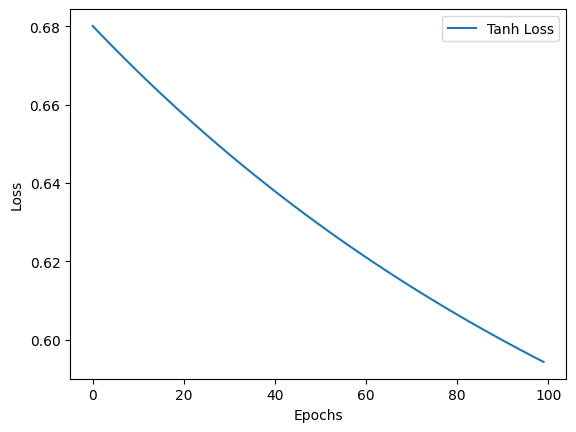

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the feed-forward neural network with customizable activation function
class SentimentNet(nn.Module):
    def __init__(self, input_size, activation_fn):
        super(SentimentNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)  # Hidden layer
        self.fc2 = nn.Linear(16, 1)  # Output layer
        self.activation_fn = activation_fn

    def forward(self, x):
        x = self.activation_fn(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Binary output (sigmoid for binary classification)
        return x

# Training function
def train_model(model, X_train, y_train, X_test, y_test, activation_name, epochs=100, lr=0.01):
    criterion = nn.BCELoss()  # Binary cross-entropy for binary classification
    optimizer = optim.SGD(model.parameters(), lr=lr)
    losses = []

    # Convert data to tensors
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train.to_numpy()).unsqueeze(1)  # Add extra dimension
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test.to_numpy()).unsqueeze(1)

    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        losses.append(loss.item())

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Print loss every 10 epochs
        if (epoch+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

    # Evaluate accuracy
    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor).round()
        accuracy = (predictions.eq(y_test_tensor).sum().item() / y_test_tensor.size(0)) * 100
        print(f"Activation Function: {activation_name}, Accuracy: {accuracy:.2f}%")

    # Plot loss curve
    plt.plot(range(epochs), losses, label=f'{activation_name} Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

# Input size (1000 features from TF-IDF)
input_size = X_train.shape[1]

# Instantiate and train the models with different activation functions
activation_functions = {'Sigmoid': nn.Sigmoid(), 'ReLU': nn.ReLU(), 'Tanh': nn.Tanh()}

for name, activation_fn in activation_functions.items():
    print(f"\nTraining with {name} activation:")
    model = SentimentNet(input_size, activation_fn)
    train_model(model, X_train, y_train, X_test, y_test, activation_name=name)


**INFERENCE**

Despite the differences in the loss value all three activation functions ultimately resulted in the same accuracy of 80.64% on the validation set. This indicates that while we are using different activation functions for training, the model's overall performance in terms of classification accuracy was consistent.

Analyzing the loss behavior:-

Sigmoid:- The model showed a steady decrease in loss, suggesting that the sigmoid activation function was effective for the dataset. Convergence is faster here than in TanH.

ReLU:- The loss started higher but converged at a slower rate. The initial loss was higher as compared to the Sigmoid activation.

TanH:- TanH provides better gradients for negative values, helping the model learn effectively, but not as steep as the Sigmoid activation function.
